Лабораторная работа № 4

Критерии сравнения групп и анализ таблиц
сопряженности

В файле pulse.txt даны показания пульса в четырех группах пациентов: группа
CB содержит уровень пульса у пациентов с заболеванием до применения
лекарственного средства, группа EB содержит уровень пульса у здоровых
людей до применения лекарственного средства, группа CA содержит уровень
пульса у пациентов с заболеванием после применения лекарственного
средства, EA содержит уровень пульса у здоровых людей после применения
лекарственного средства.

Задание 1:
1. Проверить выборки на нормальность графически и с помощью
подходящего статистического критерия.
2. Применив подходящие критерии сравнения групп определить
однородность данных «до» и «после» для обеих групп испытуемых:
«здоровых» и «пациентов» и построить коробки с усами.
3. Применив подходящие критерии сравнения групп определить
однородность данных по группам испытуемых «здоровых» и «пациентов»
для обеих случаев «до» и «после» и построить коробки с усами.
4. Сделать выводы об эффективности лекарственного средства.

В файле grades.txt даны оценки за экзамен у 4 групп.

Задание 2:
1. Составить таблицу сопряженности признаков «Группа» и «Оценка».
2. Выбрав подходящий критерий (Хи-квадрат или критерий Фишера)
проверить гипотезу об отсутствии значимой статистической связи между
признаками.

Rows: 50 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (4): CB, EB, CA, EA

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Объем выборки CB: 30 
Объем выборки EB: 50 
Объем выборки CA: 30 
Объем выборки EA: 50 
Вывод первых значений выборки CB: 68 104 102 87 76 72 
Вывод первых значений выборки EB: 76 85 90 94 68 80 
Вывод первых значений выборки CA: 86 76 72 85 74 84 
Вывод первых значений выборки EA: 64 68 64 80 72 60 


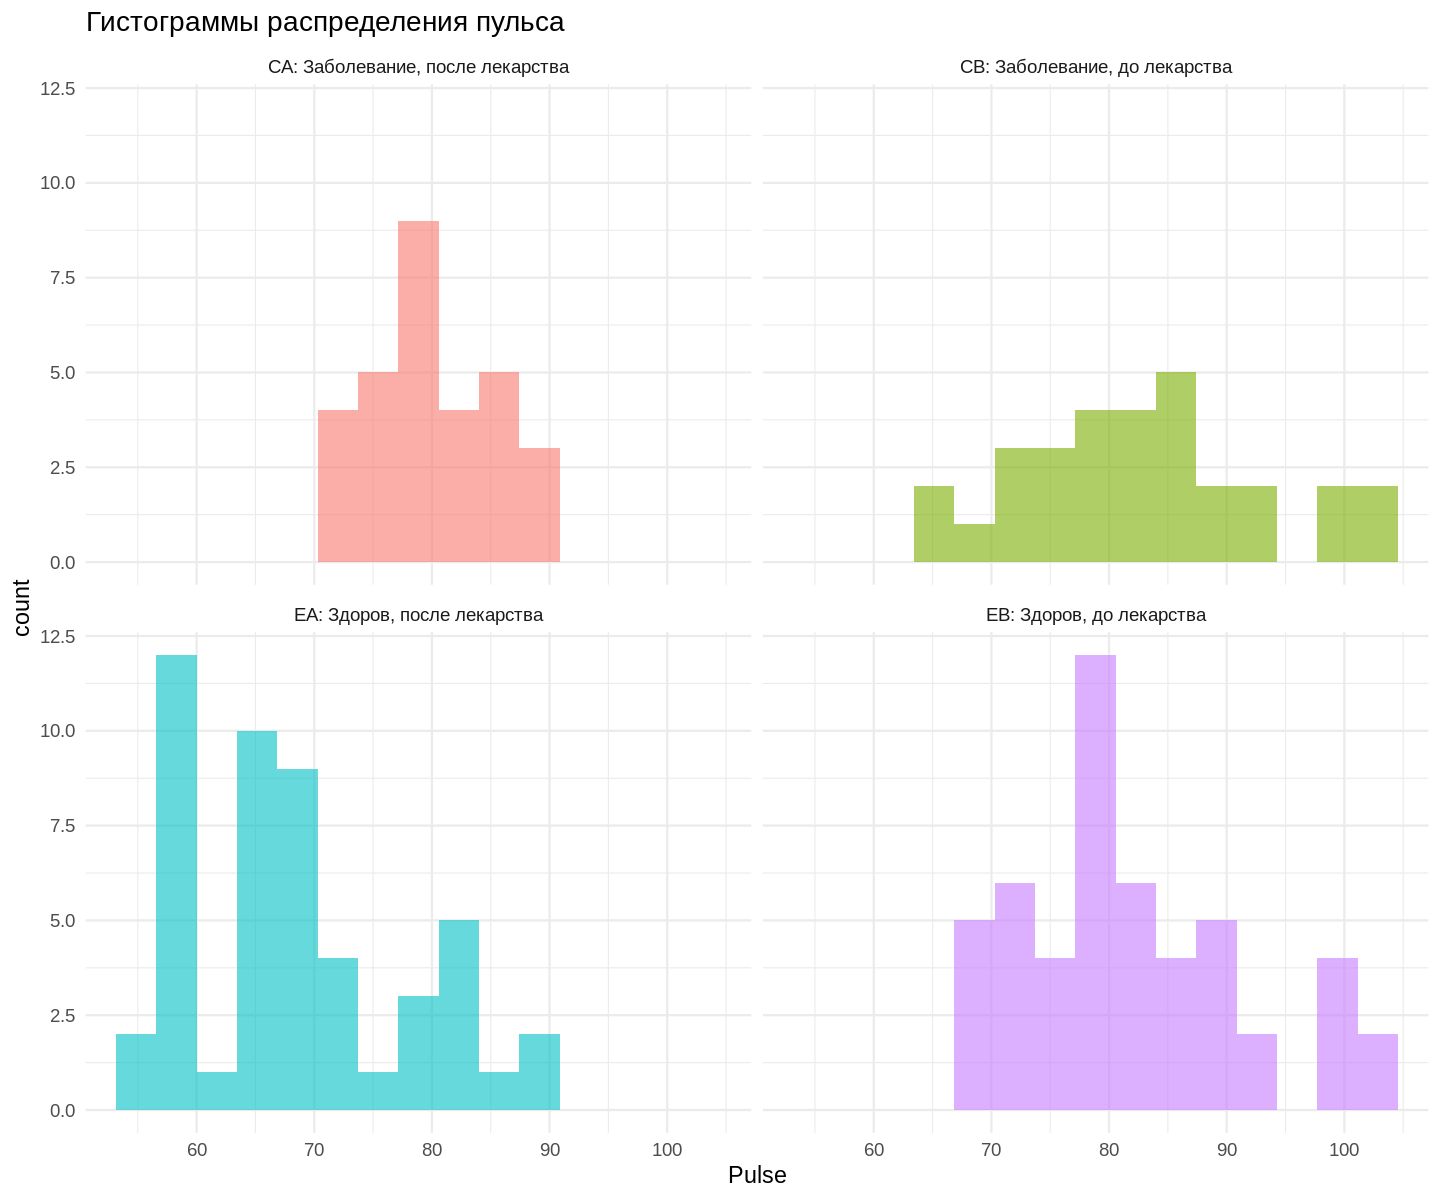


	Shapiro-Wilk normality test

data:  data_CA
W = 0.91932, p-value = 0.02576



	Shapiro-Wilk normality test

data:  data_CB
W = 0.97061, p-value = 0.5561



	Shapiro-Wilk normality test

data:  data_EA
W = 0.90569, p-value = 0.0007446



	Shapiro-Wilk normality test

data:  data_EB
W = 0.94393, p-value = 0.01933


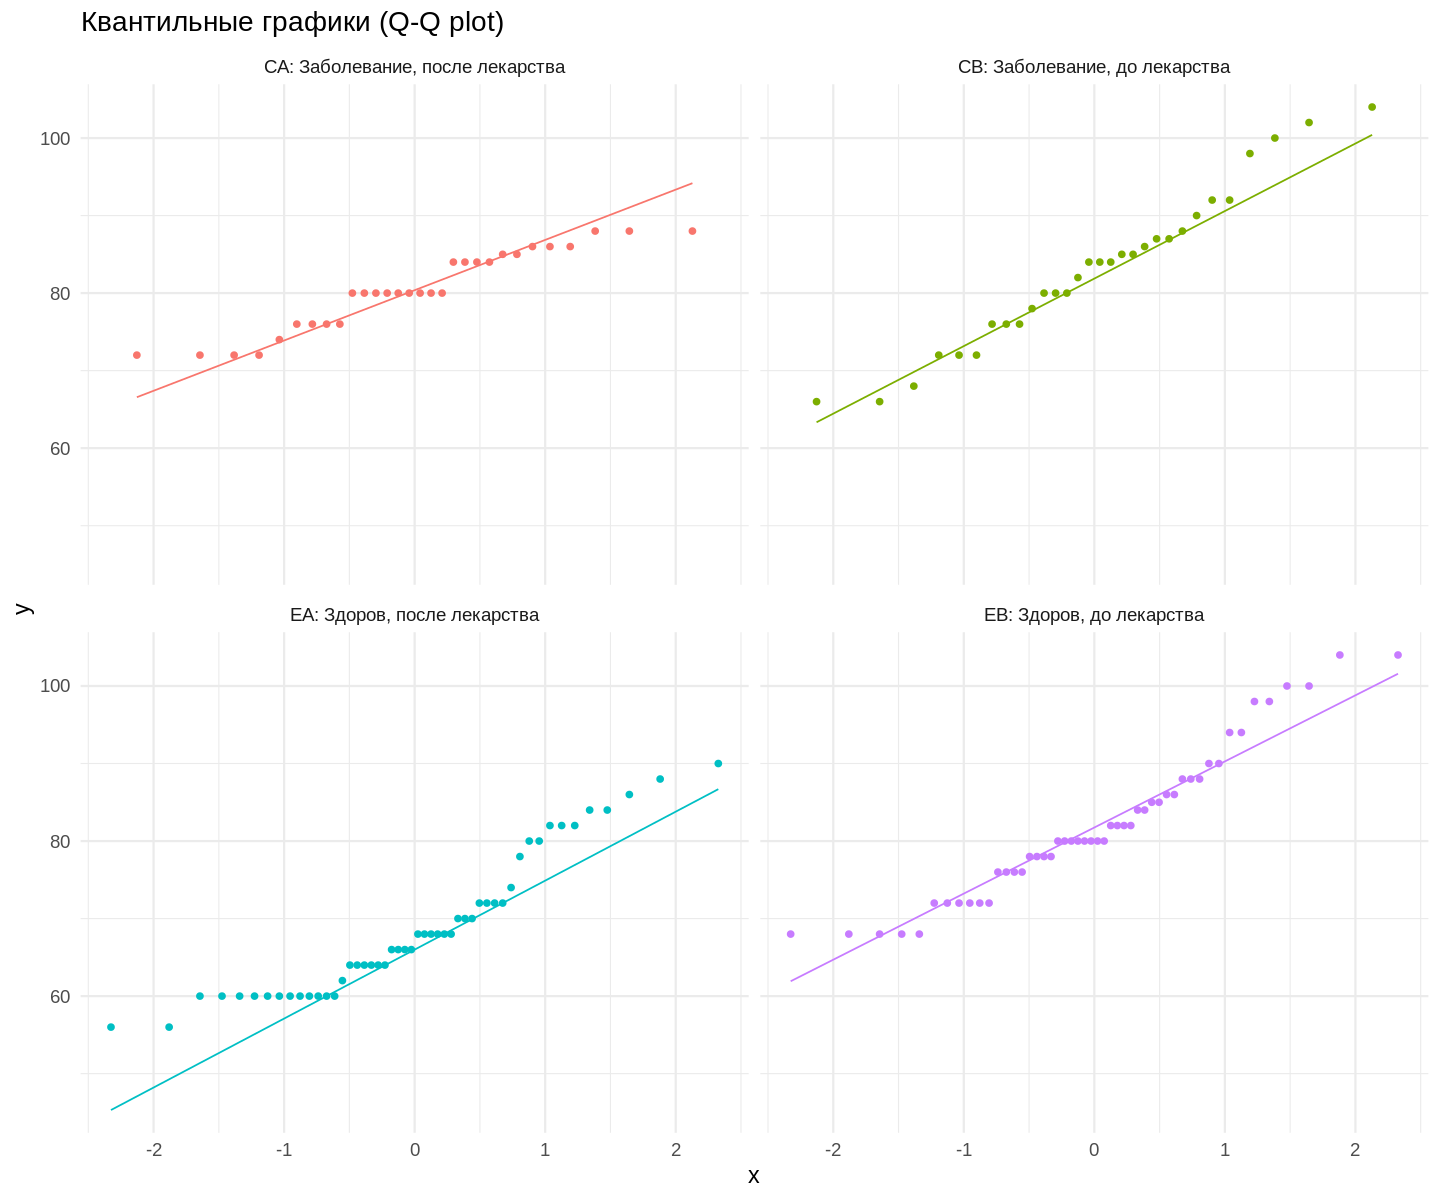

In [ ]:
# 1
# 1.1
# Подключаем библиотеки
library(ggplot2)
library(readr)
library(dplyr)
library(tidyr)  # Добавляем библиотеку для работы с пропущенными значениями

# Загружаем данные
file_path <- "pulse.txt"
pulse_data <- read_delim(file_path, delim="\t", col_names = TRUE)
# delim - значения разделены знаком '\t' (табуляцией)
# col_names = TRUE - первая строка - название групп (столбцов)

# Сохраняем столбцы в отдельные переменные
# na.omit - Убираем пропущенные значения (NA)
data_CB <- na.omit(pulse_data$CB)
data_EB <- na.omit(pulse_data$EB)
data_CA <- na.omit(pulse_data$CA)
data_EA <- na.omit(pulse_data$EA)

# Выводим длины
cat("Объем выборки CB:", length(data_CB), "\n")
cat("Объем выборки EB:", length(data_EB), "\n")
cat("Объем выборки CA:", length(data_CA), "\n")
cat("Объем выборки EA:", length(data_EA), "\n")

# Вывод первых значений для проверки
cat("Вывод первых значений выборки CB:", head(data_CB), "\n")
cat("Вывод первых значений выборки EB:", head(data_EB), "\n")
cat("Вывод первых значений выборки CA:", head(data_CA), "\n")
cat("Вывод первых значений выборки EA:", head(data_EA), "\n")

# Объединяем данные в один датафрейм для удобства визуализации
df <- data.frame(
  Pulse = c(data_CB, data_EB, data_CA, data_EA),
  Group = rep(c("CB: Заболевание, до лекарства", "EB: Здоров, до лекарства", "CA: Заболевание, после лекарства", "EA: Здоров, после лекарства"),
              times = c(length(data_CB), length(data_EB), length(data_CA), length(data_EA)))
)

# Устанавливаем размер графиков
options(repr.plot.width = 12, repr.plot.height = 10)

# Гистограммы распределения пульса
p1 <- ggplot(df, aes(x = Pulse, fill = Group)) +
  geom_histogram(alpha = 0.6, position = "identity", bins = 15) +
  facet_wrap(~Group) +
  theme_minimal(base_size = 14) +
  ggtitle("Гистограммы распределения пульса") +
  theme(legend.position = "none")  # Убираем легенду

print(p1)

# Q-Q plot для проверки нормальности
p2 <- ggplot(df, aes(sample = Pulse, color = Group)) +
  stat_qq() +
  stat_qq_line() +
  facet_wrap(~Group) +
  theme_minimal(base_size = 14) +
  ggtitle("Квантильные графики (Q-Q plot)") +
  theme(legend.position = "none")  # Убираем легенду

print(p2)



# # Проверка нормальности распределения тестом Шапиро-Уилка
shapiro.test(data_CA)
shapiro.test(data_CB)
shapiro.test(data_EA)
shapiro.test(data_EB)


In [ ]:
# 1.2

# CB: Заболевание, до лекарства
# EB: Здоров, до лекарства
# CA: Заболевание, после лекарства
# EA: Здоров, после лекарства

# Если p-value > 0.05 → данные нормальны → применяем t-test
# Если p-value < 0.05 → данные НЕ нормальны → применяем Wilcoxon

# Сравнение "до" и "после" у больных
if (shapiro.test(data_CB)$p.value > 0.05 & shapiro.test(data_CA)$p.value > 0.05) {
  test1 <- t.test(data_CB, data_CA, paired=TRUE)
} else {
  test1 <- wilcox.test(data_CB, data_CA, paired=TRUE)
}

# Сравнение "до" и "после" у здоровых
if (shapiro.test(data_EB)$p.value > 0.05 & shapiro.test(data_EA)$p.value > 0.05) {
  test2 <- t.test(data_EB, data_EA, paired=TRUE)
} else {
  test2 <- wilcox.test(data_EB, data_EA, paired=TRUE)
}

print(test1)
print(test2)


Warning message in wilcox.test.default(data_CB, data_CA, paired = TRUE):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(data_CB, data_CA, paired = TRUE):
“cannot compute exact p-value with zeroes”
Warning message in wilcox.test.default(data_EB, data_EA, paired = TRUE):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(data_EB, data_EA, paired = TRUE):
“cannot compute exact p-value with zeroes”



	Wilcoxon signed rank test with continuity correction

data:  data_CB and data_CA
V = 243.5, p-value = 0.1939
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon signed rank test with continuity correction

data:  data_EB and data_EA
V = 1115, p-value = 6.185e-08
alternative hypothesis: true location shift is not equal to 0



In [ ]:
# 1.3

# CB: Заболевание, до лекарства
# EB: Здоров, до лекарства
# CA: Заболевание, после лекарства
# EA: Здоров, после лекарства

# Если p-value > 0.05 → данные нормальны → применяем t-test
# Если p-value < 0.05 → данные НЕ нормальны → применяем Wilcoxon

# Сравнение у больных и здоровых "до"
if (shapiro.test(data_CB)$p.value > 0.05 & shapiro.test(data_EB)$p.value > 0.05) {
  test1 <- t.test(data_CB, data_EB, paired=FALSE)
} else {
  test1 <- wilcox.test(data_CB, data_EB, paired=FALSE)
}

# Сравнение у больных и здоровых "после"
if (shapiro.test(data_CA)$p.value > 0.05 & shapiro.test(data_EA)$p.value > 0.05) {
  test2 <- t.test(data_CA, data_EA, paired=FALSE)
} else {
  test2 <- wilcox.test(data_CA, data_EA, paired=FALSE)
}

print(test1)
print(test2)


	Wilcoxon rank sum test with continuity correction

data:  data_CB and data_EB
W = 807, p-value = 0.5733
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon rank sum test with continuity correction

data:  data_CA and data_EA
W = 1273.5, p-value = 1.785e-07
alternative hypothesis: true location shift is not equal to 0



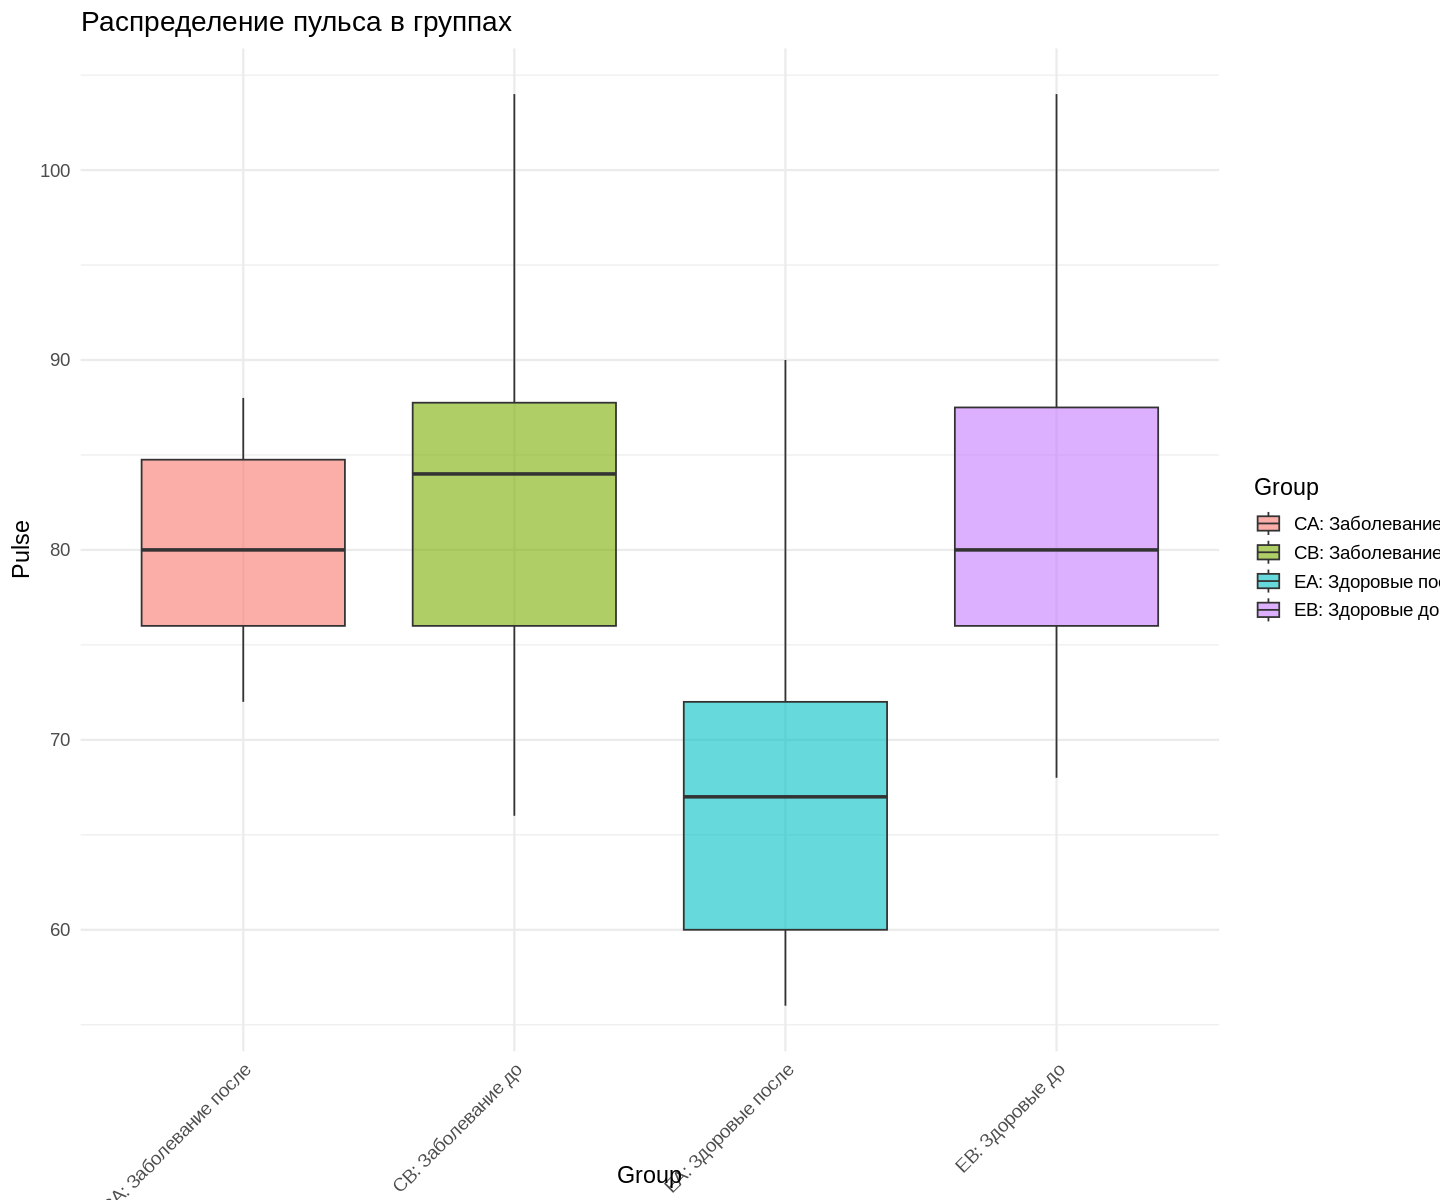

In [ ]:
# Объединяем данные в один датафрейм
pulse_data <- data.frame(
  Pulse = c(data_CB, data_CA, data_EB, data_EA),
  Group = c(
    rep("CB: Заболевание до", length(data_CB)),
    rep("CA: Заболевание после", length(data_CA)),
    rep("EB: Здоровые до", length(data_EB)),
    rep("EA: Здоровые после", length(data_EA))
  )
)

# Строим boxplot
library(ggplot2)
ggplot(pulse_data, aes(x = Group, y = Pulse, fill = Group)) +
  geom_boxplot(alpha = 0.6) +
  theme_minimal(base_size = 14) +
  ggtitle("Распределение пульса в группах") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [ ]:
# 2
# 2.1
# Подключаем библиотеки
library(ggplot2)
library(readr)
library(dplyr)
library(tidyr)  # Добавляем библиотеку для работы с пропущенными значениями

# Загружаем данные
file_path <- "grades.txt"
grades_data <- read_delim(file_path, delim="\t", col_names = TRUE)
# delim - значения разделены знаком '\t' (табуляцией)
# col_names = TRUE - первая строка - название групп (столбцов)

# Сохраняем столбцы в отдельные переменные
# na.omit - Убираем пропущенные значения (NA)
data_1 <- na.omit(grades_data$Группа_1)
data_2 <- na.omit(grades_data$Группа_2)
data_3 <- na.omit(grades_data$Группа_3)
data_4 <- na.omit(grades_data$Группа_4)

# Выводим длины
cat("Объем выборки Группа 1:", length(data_1), "\n")
cat("Объем выборки Группа 2:", length(data_2), "\n")
cat("Объем выборки Группа 3:", length(data_3), "\n")
cat("Объем выборки Группа 4:", length(data_4), "\n")

# Вывод первых значений для проверки
cat("Вывод первых значений выборки Группа 1:", head(data_1), "\n")
cat("Вывод первых значений выборки Группа 2:", head(data_2), "\n")
cat("Вывод первых значений выборки Группа 3:", head(data_3), "\n")
cat("Вывод первых значений выборки Группа 4:", head(data_4), "\n")

Rows: 30 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (4): Группа_1, Группа_2, Группа_3, Группа_4

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Объем выборки Группа 1: 30 
Объем выборки Группа 2: 30 
Объем выборки Группа 3: 30 
Объем выборки Группа 4: 30 
Вывод первых значений выборки Группа 1: 4 5 3 4 3 3 
Вывод первых значений выборки Группа 2: 4 4 3 4 5 4 
Вывод первых значений выборки Группа 3: 4 4 4 4 3 3 
Вывод первых значений выборки Группа 4: 5 5 3 5 4 5 


In [ ]:
# Создаём таблицу сопряженности
contingency_table <- table(stack(grades_data)$values, stack(grades_data)$ind)
colnames(contingency_table) <- c("Группа 1", "Группа 2", "Группа 3", "Группа 4")

# Вывод таблицы
print(contingency_table)

   
    Группа 1 Группа 2 Группа 3 Группа 4
  3       17       12       13        4
  4       11       15       12        7
  5        2        3        5       19


In [ ]:
chisq_test <- chisq.test(contingency_table)

# Вывод результатов
print(chisq_test)


	Pearson's Chi-squared test

data:  contingency_table
X-squared = 36.685, df = 6, p-value = 2.028e-06



In [ ]:
fisher_test <- fisher.test(contingency_table)
print(fisher_test)

ERROR: Error in fisher.test(contingency_table): FEXACT error 7(location). LDSTP=18630 is too small for this problem,
  (pastp=46.4889, ipn_0:=ipoin[itp=260]=21, stp[ipn_0]=44.9634).
Increase workspace or consider using 'simulate.p.value=TRUE'
